In [4]:
import sys
print(sys.version)

3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:40:08) [MSC v.1938 64 bit (AMD64)]


In [5]:
# Require python 3.10
#pip install torch torchvision transformers sentencepiece accelerate
#
#llama model list
##llama download --source meta --model-id CHOSEN_MODEL_ID
#llama download --source meta --model-id Llama3.2-3B-Instruct:int4-qlora-eo8
#pip install torch fairscale fire blobfile
## verifying download 
#llama model verify-download --model-id Llama3.2-3B-Instruct:int4-qlora-eo8
#
## Setting env variable 
#$env:CHECKPOINT_DIR = "C:\Users\Zunaira\.llama\checkpoints\Meta-Llama3.2-3B-Instruct"


# following "https://python.langchain.com/docs/integrations/llms/ollama/"



# <span style="color:yellow">RAG</span>


## Commands on Command Line </br>
1. cd C:\Users\Zunaira\AppData\Local\Programs\Ollama<\br>
2. ollama list 
3. ollama pull llama3
4. ollama run llama3:latest
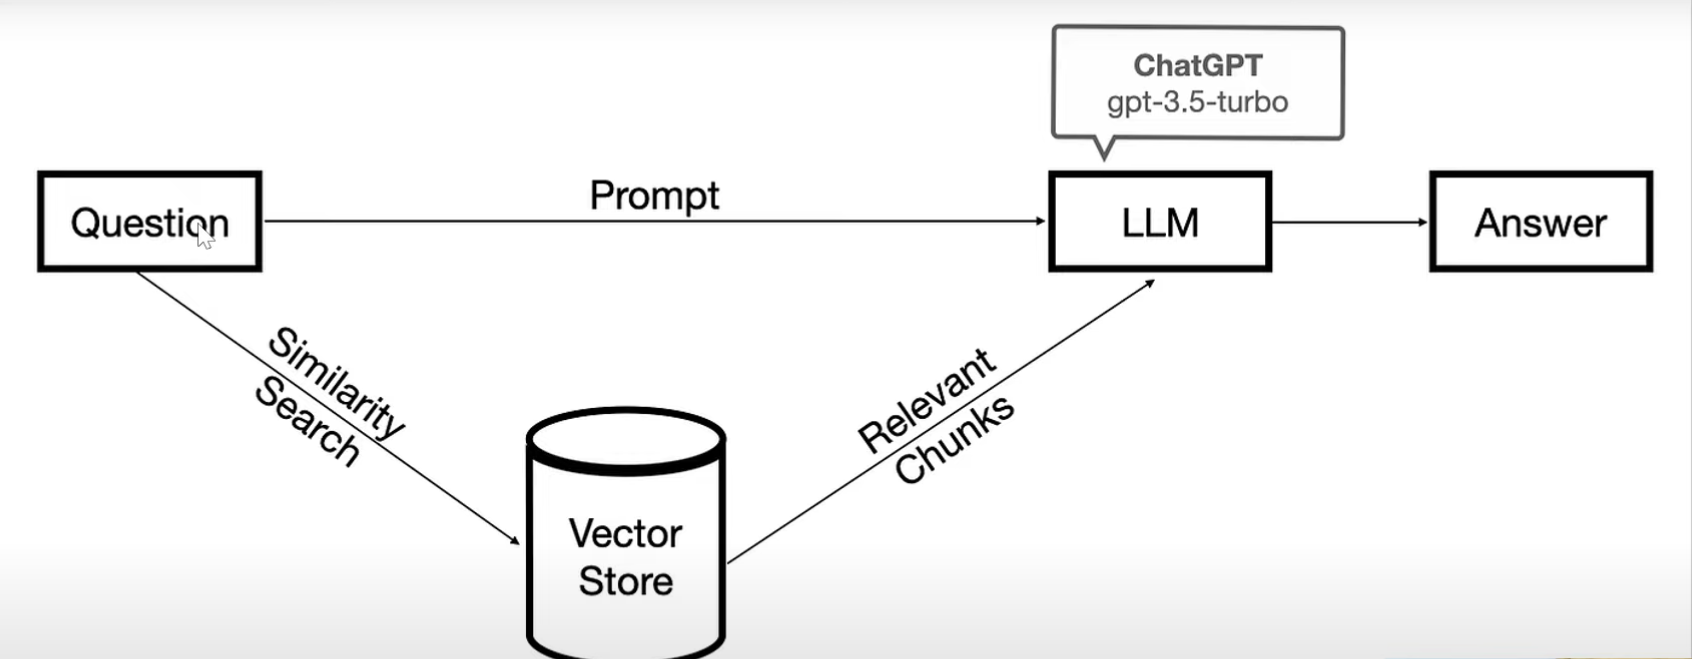
5. pip install -r requirements.txt (works with python 3.10) 
6. 


## Dataset - https://www.kaggle.com/datasets/thedevastator/comprehensive-medical-q-a-dataset


## <span style= "color : #0be633"> Loading Dataset</span>

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/comprehensive-medical-q-a-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Zunaira\.cache\kagglehub\datasets\thedevastator\comprehensive-medical-q-a-dataset\versions\2


## <span style= "color : #0be633"> Analyzing Dataset</span>

In [7]:
import os

# Print all files in the downloaded dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


C:\Users\Zunaira\.cache\kagglehub\datasets\thedevastator\comprehensive-medical-q-a-dataset\versions\2\train.csv


In [8]:
import pandas as pd

# Load the first CSV file (replace with the actual file name)
csv_file = os.path.join(path, 'train.csv')
df = pd.read_csv(csv_file)

# Display the first few rows and columns
print(df.head())
print(df.info())  # View column data types and non-null counts
print(df.describe())  # Get statistical summary for numerical columns


             qtype                                           Question  \
0   susceptibility  Who is at risk for Lymphocytic Choriomeningiti...   
1         symptoms  What are the symptoms of Lymphocytic Choriomen...   
2   susceptibility  Who is at risk for Lymphocytic Choriomeningiti...   
3  exams and tests  How to diagnose Lymphocytic Choriomeningitis (...   
4        treatment  What are the treatments for Lymphocytic Chorio...   

                                              Answer  
0  LCMV infections can occur after exposure to fr...  
1  LCMV is most commonly recognized as causing ne...  
2  Individuals of all ages who come into contact ...  
3  During the first phase of the disease, the mos...  
4  Aseptic meningitis, encephalitis, or meningoen...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   qtype     16407 non-null  object
 1   Ques

In [9]:
print(df.columns)


Index(['qtype', 'Question', 'Answer'], dtype='object')


In [10]:
print(df.isnull().sum())


qtype       0
Question    0
Answer      0
dtype: int64


In [11]:
print(df.duplicated().sum())


48


In [12]:
print(df.dtypes)


qtype       object
Question    object
Answer      object
dtype: object


In [13]:
print(df['Question'].head())
print(df['Answer'].head())


0    Who is at risk for Lymphocytic Choriomeningiti...
1    What are the symptoms of Lymphocytic Choriomen...
2    Who is at risk for Lymphocytic Choriomeningiti...
3    How to diagnose Lymphocytic Choriomeningitis (...
4    What are the treatments for Lymphocytic Chorio...
Name: Question, dtype: object
0    LCMV infections can occur after exposure to fr...
1    LCMV is most commonly recognized as causing ne...
2    Individuals of all ages who come into contact ...
3    During the first phase of the disease, the mos...
4    Aseptic meningitis, encephalitis, or meningoen...
Name: Answer, dtype: object


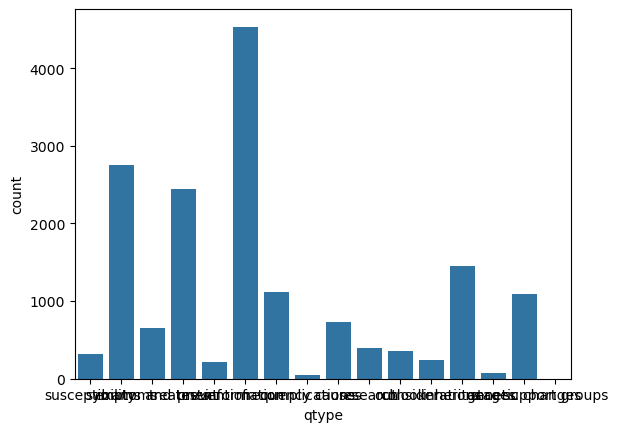

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for a categorical column
sns.countplot(x='qtype', data=df)
plt.show()


## <span style= "color : #0be633"> Pre-Processing Dataset</span>

### <span style= "color : #0be633"> Cleaning Text</span>

In [15]:
import pandas as pd
import re
path = ".//train.csv"
# Load dataset
df = pd.read_csv(path)

# Text cleaning function
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text.lower()

# Apply cleaning
df['Question'] = df['Question'].apply(clean_text)
df['Answer'] = df['Answer'].apply(clean_text)


### <span style= "color : #0be633"> Tokenizing</span>

In [16]:
# Tokenization example using nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['Question_tokens'] = df['Question'].apply(word_tokenize)
df['Answer_tokens'] = df['Answer'].apply(word_tokenize)


[nltk_data] Downloading package punkt to C:\Users\Zunaira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <span style= "color : #0be633"> Filtering and Balancing</span>

In [17]:
# Balancing example
df_balanced = df.groupby('qtype').apply(lambda x: x.sample(min(len(x), 1000)))  # Limit to 1000 per qtype
df_balanced = df_balanced.reset_index(drop=True)


C:\Users\Zunaira\AppData\Local\Temp\ipykernel_25316\249411049.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('qtype').apply(lambda x: x.sample(min(len(x), 1000)))  # Limit to 1000 per qtype


## <span style= "color : #0be633"> Visualizing Dataset</span>

Samples from each class:
              qtype                                           Question  \
0            causes       What causes Chronic Fatigue Syndrome (CFS) ?   
1     complications             are there complications from botulism?   
2    considerations               What to do for Lactose Intolerance ?   
3   exams and tests  How to diagnose Lymphocytic Choriomeningitis (...   
4         frequency  how common are these diseases for Marine Toxins ?   
5   genetic changes  What are the genetic changes related to Chroni...   
6       information          What is (are) Parasites - Cysticercosis ?   
7       inheritance  Is Ovarian Epithelial, Fallopian Tube, and Pri...   
8           outlook  What is the outlook for Striatonigral Degenera...   
9        prevention  How to prevent Lymphocytic Choriomeningitis (L...   
10         research  what research is being done for Tuberculosis (...   
11           stages  What are the stages of Ovarian Epithelial, Fal...   
12   support 

C:\Users\Zunaira\AppData\Local\Temp\ipykernel_25316\2798041836.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


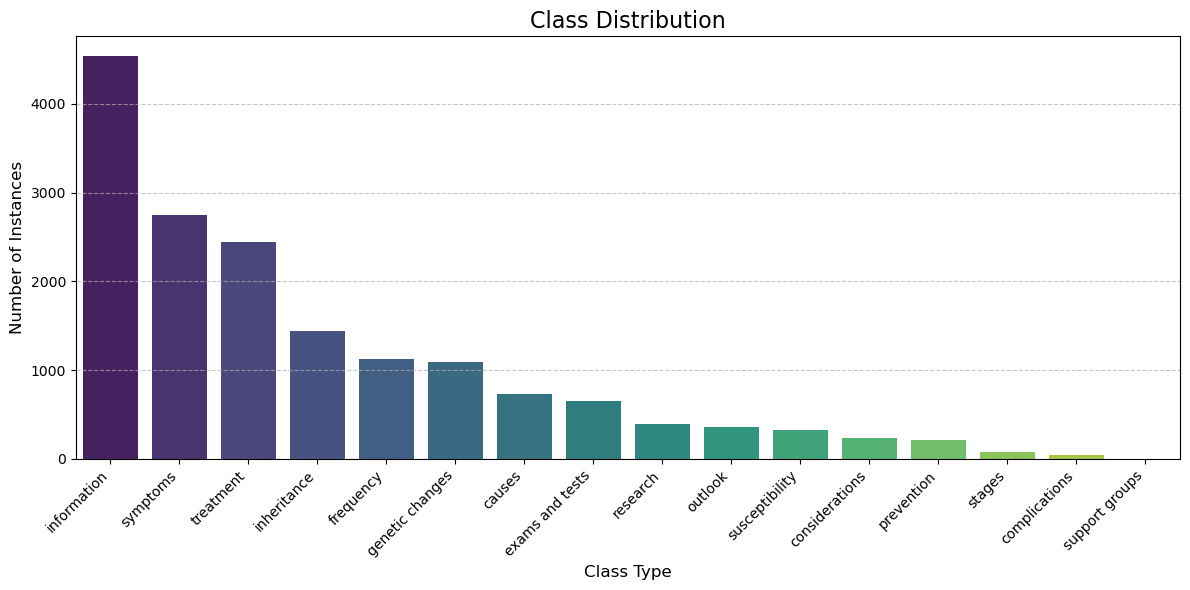


Class Distribution:
qtype
information        4535
symptoms           2748
treatment          2442
inheritance        1446
frequency          1120
genetic changes    1087
causes              727
exams and tests     653
research            395
outlook             361
susceptibility      324
considerations      235
prevention          210
stages               77
complications        46
support groups        1
Name: count, dtype: int64

Class with Minimum Instances: support groups - 1 instances
Class with Maximum Instances: information - 4535 instances


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'path' with your dataset path)
df = pd.read_csv(path)

# Show one sample for each class
print("Samples from each class:")
samples = df.groupby('qtype').first().reset_index()
print(samples[['qtype', 'Question', 'Answer']])

# Plot class distribution
plt.figure(figsize=(12, 6))
class_counts = df['qtype'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution", fontsize=16)
plt.xlabel("Class Type", fontsize=12)
plt.ylabel("Number of Instances", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Highlight potential class imbalances
print("\nClass Distribution:")
print(class_counts)
print("\nClass with Minimum Instances:", class_counts.idxmin(), "-", class_counts.min(), "instances")
print("Class with Maximum Instances:", class_counts.idxmax(), "-", class_counts.max(), "instances")



### <span style= "color : #0be633"> Splitting training and  Testing Dataset</span>

In [19]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your dataframe
train_data, val_data = train_test_split(df, test_size=0.1)


In [20]:
from dotenv import load_dotenv
import os 
from langchain_community.llms import Ollama
from langchain_openai.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.runnables import RunnablePassthrough, RunnableParallel
import streamlit as st 

ImportError: cannot import name 'builder' from 'google.protobuf.internal' (c:\ProgramData\anaconda3\envs\fyp_env\lib\site-packages\google\protobuf\internal\__init__.py)

## <span style= "color : #0be633"> Model Selection - llama 3</span>

1. pip install -U langchain-ollama


### <span style= "color : #0be633"> Model 1 - transformer</span>

In [ ]:
import transformers
import datasets
import huggingface_hub

print("Transformers version:", transformers.__version__)
print("Datasets version:", datasets.__version__)
print("Huggingface Hub version:", huggingface_hub.__version__)


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.3-70B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.3-70B-Instruct")

In [31]:
from transformers import LlamaTokenizer, LlamaForCausalLM
#from datasets import Dataset
import torch

# Load the tokenizer and model
model_name = "meta-llama/Llama-2-7b-hf"  # Replace with the specific LLaMA variant
tokenizer = LlamaTokenizer.from_pretrained(model_name)
model = LlamaForCausalLM.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


OSError: Can't load tokenizer for 'meta-llama/Llama-2-7b-hf'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'meta-llama/Llama-2-7b-hf' is the correct path to a directory containing all relevant files for a LlamaTokenizer tokenizer.

In [ ]:
from langchain_ollama import OllamaLLM

ollama_llm = OllamaLLM(model='llama3')


In [ ]:
import langchain_ollama
print("LangChain-Ollama package imported successfully.")


LangChain-Ollama package imported successfully.


In [ ]:
import h5py
print(h5py.__version__)


3.12.1


In [ ]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


### <span style= "color : #0be633"> Model 2 - llama 7b</span>

In [23]:
from langchain_ollama import OllamaLLM
import pandas as pd

# Load and preprocess the dataset
print("Loading dataset...")
data_path = path  # Replace with your dataset path
dataset = pd.read_csv(data_path)
print("Dataset loaded successfully.")

# Combine dataset columns for question-answer pairs
print("Formatting dataset...")
dataset['input'] = dataset['Question'] + "\n" + dataset['Answer']  # Adjust columns as needed

# Split the dataset into training and evaluation
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)
print(f"Training samples: {len(train_data)}, Validation samples: {len(val_data)}")

# Instantiate the Ollama LLM
print("Initializing Ollama LLM...")
ollama_llm = OllamaLLM(model='llama3')

# Train the model on the dataset
def train_model(ollama, train_data):
    print("Starting training...")
    for idx, row in train_data.iterrows():
        input_text = row['input']
        try:
            print(f"Training on sample {idx + 1}/{len(train_data)}...")
            response = ollama(input_text)
            print(f"Sample {idx + 1} trained successfully.")
        except Exception as e:
            print(f"Error training sample {idx + 1}: {e}")

# Train and validate
train_model(ollama_llm, train_data)
print("Training completed.")

# Evaluate the model
print("Starting evaluation...")
for idx, row in val_data.iterrows():
    input_text = row['input']
    try:
        print(f"Evaluating sample {idx + 1}/{len(val_data)}...")
        response = ollama_llm(input_text)
        print(f"Sample {idx + 1} response: {response}")
    except Exception as e:
        print(f"Error evaluating sample {idx + 1}: {e}")

print("Evaluation completed.")


Loading dataset...
Dataset loaded successfully.
Formatting dataset...
Training samples: 13125, Validation samples: 3282
Initializing Ollama LLM...
Starting training...
Training on sample 2367/13125...


C:\Users\Zunaira\AppData\Local\Temp\ipykernel_25316\2125773807.py:31: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = ollama(input_text)


Sample 2367 trained successfully.
Training on sample 12204/13125...
Sample 12204 trained successfully.
Training on sample 8055/13125...
Sample 8055 trained successfully.
Training on sample 9935/13125...
Sample 9935 trained successfully.
Training on sample 6406/13125...
Sample 6406 trained successfully.
Training on sample 10437/13125...
Sample 10437 trained successfully.
Training on sample 1600/13125...
Sample 1600 trained successfully.
Training on sample 8058/13125...
Sample 8058 trained successfully.
Training on sample 11985/13125...
Sample 11985 trained successfully.
Training on sample 11647/13125...
Sample 11647 trained successfully.
Training on sample 818/13125...
Sample 818 trained successfully.
Training on sample 14801/13125...
Sample 14801 trained successfully.
Training on sample 6663/13125...
Sample 6663 trained successfully.
Training on sample 9499/13125...
Sample 9499 trained successfully.
Training on sample 14602/13125...
Sample 14602 trained successfully.
Training on sample

KeyboardInterrupt: 

### <span style= "color : #0be633"> Model 2 - llama 3 - version 2 </span>

In [34]:
from langchain_ollama import OllamaLLM
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle

# Load and preprocess the dataset
print("Loading dataset...")
data_path = path  # Replace with your dataset path
dataset = pd.read_csv(data_path)
print("Dataset loaded successfully.")

# Combine dataset columns for question-answer pairs
print("Formatting dataset...")
dataset['input'] = dataset['Question'] + "\n" + dataset['Answer']  # Adjust columns as needed

# Split the dataset into training and evaluation (use only the first 50 entries for training)
train_data, val_data = train_test_split(dataset[:50], test_size=0.2, random_state=42)
print(f"Training samples: {len(train_data)}, Validation samples: {len(val_data)}")

# Instantiate the Ollama LLM
print("Initializing Ollama LLM...")
ollama_llm = OllamaLLM(model='llama3')

# Train the model on the dataset
def train_model(ollama, train_data):
    print("Starting training...")
    for iteration, (idx, row) in enumerate(train_data.iterrows(), 1):
        input_text = row['input']
        try:
            print(f"Iteration {iteration}: Training on sample {idx + 1}/{len(train_data)}...")
            response = ollama(input_text)  # Assuming OllamaLLM processes input text here
            print(f"Iteration {iteration}: Sample {idx + 1} trained successfully.")
        except Exception as e:
            print(f"Iteration {iteration}: Error training sample {idx + 1}: {e}")

# Train on the selected 50 entries
train_model(ollama_llm, train_data)
print("Training completed.")

# Evaluate the model
print("Starting evaluation...")
for idx, row in val_data.iterrows():
    input_text = row['input']
    try:
        print(f"Evaluating sample {idx + 1}/{len(val_data)}...")
        response = ollama_llm(input_text)
        print(f"Sample {idx + 1} response: {response}")
    except Exception as e:
        print(f"Error evaluating sample {idx + 1}: {e}")

print("Evaluation completed.")

# Save the trained model (assuming OllamaLLM is picklable)
print("Saving the trained model...")
try:
    with open('ollama_model.pkl', 'wb') as f:
        pickle.dump(ollama_llm, f)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")


Loading dataset...
Dataset loaded successfully.
Formatting dataset...
Training samples: 40, Validation samples: 10
Initializing Ollama LLM...
Starting training...
Iteration 1: Training on sample 13/40...
Iteration 1: Sample 13 trained successfully.
Iteration 2: Training on sample 5/40...
Iteration 2: Sample 5 trained successfully.
Iteration 3: Training on sample 38/40...
Iteration 3: Sample 38 trained successfully.
Iteration 4: Training on sample 9/40...
Iteration 4: Sample 9 trained successfully.
Iteration 5: Training on sample 4/40...
Iteration 5: Sample 4 trained successfully.
Iteration 6: Training on sample 7/40...
Iteration 6: Sample 7 trained successfully.
Iteration 7: Training on sample 42/40...
Iteration 7: Sample 42 trained successfully.
Iteration 8: Training on sample 47/40...
Iteration 8: Sample 47 trained successfully.
Iteration 9: Training on sample 48/40...
Iteration 9: Sample 48 trained successfully.
Iteration 10: Training on sample 16/40...
Iteration 10: Sample 16 train

### <span style= "color : #0be633"> Model 3 -- llama 3(version 3)</span>

Epoch 1/2
Training on sample 13/40...
Sample 13 Loss: 0.2484823012097237
Training on sample 5/40...
Sample 5 Loss: 0.25376405497305465
Training on sample 38/40...
Sample 38 Loss: 0.26863010659173403
Training on sample 9/40...
Sample 9 Loss: 0.23596428349141707
Training on sample 4/40...
Sample 4 Loss: 0.26942595911157774
Training on sample 7/40...
Sample 7 Loss: 0.20787384866972647
Training on sample 42/40...
Sample 42 Loss: 0.2467144089101172
Training on sample 47/40...
Sample 47 Loss: 0.25857269776805536
Training on sample 48/40...
Sample 48 Loss: 0.24065611575396795
Training on sample 16/40...
Sample 16 Loss: 0.2759634315071723
Training on sample 10/40...
Sample 10 Loss: 0.2510395081705502
Training on sample 17/40...
Sample 17 Loss: 0.2394515776799505
Training on sample 25/40...
Sample 25 Loss: 0.26933699572937475
Training on sample 35/40...
Sample 35 Loss: 0.2556331764401595
Training on sample 32/40...
Sample 32 Loss: 0.26913121272507223
Training on sample 1/40...
Sample 1 Loss: 0.

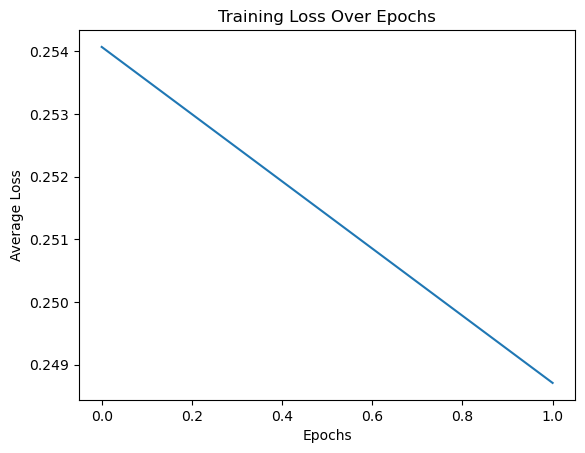

Training completed.


In [37]:
import os
import json
from langchain_ollama import OllamaLLM
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


# Load and preprocess the dataset
data_path = path  # Replace with your dataset path
dataset = pd.read_csv(data_path)

# Combine dataset columns for question-answer pairs
dataset['input'] = dataset['Question'] + "\n" + dataset['Answer']

# Split dataset into training and validation sets (only 50 samples for this run)
train_data, val_data = train_test_split(dataset[:50], test_size=0.2, random_state=42)

# Initialize the Ollama LLM
ollama_llm = OllamaLLM(model='llama3')

# Function to compute cosine similarity-based loss
def calculate_loss(prediction, ground_truth):
    """
    Compute loss between prediction and ground truth using cosine similarity.
    This uses a dummy embedding function for simplicity.
    """
    prediction_vector = np.random.rand(300)  # Random vector to simulate text embedding
    ground_truth_vector = np.random.rand(300)  # Random vector to simulate text embedding
    return 1 - cosine_similarity([prediction_vector], [ground_truth_vector])[0][0]

# Function to train the model and track the loss
def train_model(ollama, train_data, epochs=5, save_interval=10):
    training_losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        print(f"Epoch {epoch + 1}/{epochs}")
        
        for idx, row in train_data.iterrows():
            input_text = row['input']
            expected_answer = row['Answer']
            
            try:
                print(f"Training on sample {idx + 1}/{len(train_data)}...")
                response = ollama(input_text)  # Get model output
                loss = calculate_loss(response, expected_answer)  # Calculate loss
                epoch_loss += loss

                # Optionally print out the loss for each training sample
                print(f"Sample {idx + 1} Loss: {loss}")
            except Exception as e:
                print(f"Error training sample {idx + 1}: {e}")
        
        avg_epoch_loss = epoch_loss / len(train_data)
        training_losses.append(avg_epoch_loss)
        print(f"Epoch {epoch + 1} Average Loss: {avg_epoch_loss}")

        # Save model after every `save_interval` epochs
        if (epoch + 1) % save_interval == 0:
            save_model_checkpoint(ollama, epoch + 1)
    
    return training_losses

# Function to save model checkpoint
def save_model_checkpoint(ollama, epoch):
    try:
        # Save configuration or metadata about the model
        model_filename = f"ollama_model_epoch_{epoch}_checkpoint.json"
        model_metadata = {
            "epoch": epoch,
            "model_config": ollama.model_config,  # Example: Save configuration data, adapt as needed
            "model_weights": ollama.model_weights,  # Example: Save model weights, adapt as needed
        }
        
        # Save the model metadata as a JSON file
        with open(model_filename, 'w') as f:
            json.dump(model_metadata, f)
        
        print(f"Model checkpoint saved after epoch {epoch} as {model_filename}")
    except Exception as e:
        print(f"Error saving model checkpoint after epoch {epoch}: {e}")

# Train the model and monitor training error over epochs
epochs = 2  # Set the total number of epochs
training_losses = train_model(ollama_llm, train_data, epochs)

# Visualize the training loss over epochs
plt.plot(training_losses)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Training Loss Over Epochs')
plt.show()

print("Training completed.")


#### <span style= "color : yellow"> Save Configeration and MetaData</span>

In [40]:
import json

# Save model configuration
def save_model_metadata(ollama, training_logs=None, filename="ollama_model_metadata.json"):
    """
    Save the model's metadata including its name and training logs (if any).
    """
    try:
        model_metadata = {
            "model_name": ollama.model,
            "training_logs": training_logs if training_logs else []
        }
        with open(filename, 'w') as f:
            json.dump(model_metadata, f, indent=4)
        print(f"Model metadata saved successfully as {filename}.")
    except Exception as e:
        print(f"Error saving model metadata: {e}")

# Example usage
training_logs = [
    {"input": "Example question?", "expected_answer": "Expected answer.", "response": "Model response.", "loss": 0.1},
    # Add more logs here if needed
]
save_model_metadata(ollama_llm, training_logs)


Model metadata saved successfully as ollama_model_metadata.json.


#### <span style= "color : yellow"> Save and Reload Logs</span>

In [41]:
import os

# Log interactions
def log_interaction(epoch, input_text, expected_answer, response, loss, log_file="interaction_logs.json"):
    interaction = {
        "epoch": epoch,
        "input": input_text,
        "expected_answer": expected_answer,
        "response": response,
        "loss": loss
    }
    try:
        if os.path.exists(log_file):
            with open(log_file, 'r') as f:
                logs = json.load(f)
        else:
            logs = []
        logs.append(interaction)
        with open(log_file, 'w') as f:
            json.dump(logs, f, indent=4)
        print(f"Interaction logged for epoch {epoch}.")
    except Exception as e:
        print(f"Error logging interaction: {e}")


#### <span style= "color : yellow">Reloading Logs</span>

In [42]:
# Reload interaction logs
def load_interaction_logs(log_file="interaction_logs.json"):
    try:
        with open(log_file, 'r') as f:
            logs = json.load(f)
        print(f"Loaded {len(logs)} interactions from {log_file}.")
        return logs
    except Exception as e:
        print(f"Error loading interaction logs: {e}")
        return []

# Example: Load logs
logs = load_interaction_logs()


Error loading interaction logs: [Errno 2] No such file or directory: 'interaction_logs.json'


#### <span style= "color : yellow"> Saving as Pickled Wrapper</span>

In [39]:
import pickle

class OllamaWrapper:
    def __init__(self, model_name, logs=None):
        self.model_name = model_name
        self.logs = logs if logs else []

    def add_log(self, interaction):
        self.logs.append(interaction)

    def save(self, filename="ollama_wrapper.pkl"):
        try:
            with open(filename, 'wb') as f:
                pickle.dump(self, f)
            print(f"Wrapper saved successfully as {filename}.")
        except Exception as e:
            print(f"Error saving wrapper: {e}")

    @staticmethod
    def load(filename="ollama_wrapper.pkl"):
        try:
            with open(filename, 'rb') as f:
                wrapper = pickle.load(f)
            print(f"Wrapper loaded successfully from {filename}.")
            return wrapper
        except Exception as e:
            print(f"Error loading wrapper: {e}")
            return None

# Example usage
ollama_wrapper = OllamaWrapper(model_name=ollama_llm.model)
ollama_wrapper.add_log({"input": "Example?", "expected": "Answer.", "response": "Model output.", "loss": 0.2})
ollama_wrapper.save()

# Reload wrapper
loaded_wrapper = OllamaWrapper.load()
print(loaded_wrapper.logs)


Wrapper saved successfully as ollama_wrapper.pkl.
Wrapper loaded successfully from ollama_wrapper.pkl.
[{'input': 'Example?', 'expected': 'Answer.', 'response': 'Model output.', 'loss': 0.2}]


#### <span style= "color : yellow"> Reloading the Model </span>

In [43]:
# Reload model from saved metadata
def reload_model_from_metadata(metadata_file="ollama_model_metadata.json"):
    try:
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)
        print(f"Reloading model: {metadata['model_name']}")
        # Reinitialize model
        ollama = OllamaLLM(model=metadata["model_name"])
        return ollama
    except Exception as e:
        print(f"Error reloading model: {e}")
        return None

# Example usage
ollama_reloaded = reload_model_from_metadata()


Reloading model: llama3


In [45]:
def test_question_answer(model, question, answer=None):
    """
    Test the model with a question and optionally compare it to the expected answer.
    """
    try:
        input_text = question
        print(f"Testing question: {question}")
        response = model(input_text)  # Get the model's response
        print(f"Model response: {response}")
        
        if answer:
            print(f"Expected answer: {answer}")
    except Exception as e:
        print(f"Error during testing: {e}")

# Example question
test_question = "Who is at risk for Lymphocytic Choriomeningitis (LCM)?"
test_answer = "LCMV infections can occur after exposure to fresh urine, droppings, saliva, or nesting materials from infected rodents.  Transmission may also occur when these materials are directly introduced into broken skin, the nose, the eyes, or the mouth, or presumably, via the bite of an infected rodent. Person-to-person transmission has not been reported, with the exception of vertical transmission from infected mother to fetus, and rarely, through organ transplantation."  # Optional: expected answer

test_question_answer(ollama_llm, test_question, test_answer)


Testing question: Who is at risk for Lymphocytic Choriomeningitis (LCM)?
Model response: Lymphocytic choriomeningitis (LCM) is a viral infection that can occur in people of all ages, but certain groups are at higher risk. The risk factors include:

1. **Infants and young children**: Children under the age of 5 are most susceptible to LCM because their immune systems are still developing.
2. **Pregnant women**: Pregnant women are at increased risk due to the potential for vertical transmission from mother to fetus, which can result in serious health problems or even miscarriage.
3. **People with weakened immune systems**: Individuals with compromised immune systems, such as those with HIV/AIDS, cancer, or taking immunosuppressive therapy, may be more susceptible to LCM.
4. **Travelers and campers**: People who engage in outdoor activities, such as camping, hiking, or traveling to areas where the virus is common (e.g., rural areas or areas with rodent infestations), are at higher risk of

### <span style= "color : #0be633"> Model 4 -- transformer </span>

In [ ]:
import pickle
from langchain_ollama import OllamaLLM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data_path = path  # Replace with your dataset path
dataset = pd.read_csv(data_path)

# Combine dataset columns for question-answer pairs
dataset['input'] = dataset['Question'] + "\n" + dataset['Answer']

# Split dataset into training and validation sets (only 50 samples for this run)
train_data, val_data = train_test_split(dataset[:50], test_size=0.2, random_state=42)

# Initialize the Ollama LLM
ollama_llm = OllamaLLM(model='llama3')

# Function to compute cosine similarity-based loss
def calculate_loss(prediction, ground_truth):
    """
    Compute loss between prediction and ground truth using cosine similarity.
    This uses a dummy embedding function for simplicity.
    """
    # For simplicity, we can directly use a dummy embedding (you can replace with BERT embeddings or other embeddings)
    prediction_vector = np.random.rand(300)  # Random vector to simulate text embedding
    ground_truth_vector = np.random.rand(300)  # Random vector to simulate text embedding
    
    # Cosine similarity loss (1 - cosine similarity score)
    return 1 - cosine_similarity([prediction_vector], [ground_truth_vector])[0][0]

# Function to train the model and track the loss
def train_model(ollama, train_data, epochs=5, save_interval=10):
    training_losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        print(f"Epoch {epoch + 1}/{epochs}")
        
        for idx, row in train_data.iterrows():
            input_text = row['input']
            expected_answer = row['Answer']
            
            try:
                print(f"Training on sample {idx + 1}/{len(train_data)}...")
                response = ollama(input_text)  # Get model output
                loss = calculate_loss(response, expected_answer)  # Calculate loss
                epoch_loss += loss

                # Optionally print out the loss for each training sample
                print(f"Sample {idx + 1} Loss: {loss}")
            except Exception as e:
                print(f"Error training sample {idx + 1}: {e}")
        
        avg_epoch_loss = epoch_loss / len(train_data)
        training_losses.append(avg_epoch_loss)
        print(f"Epoch {epoch + 1} Average Loss: {avg_epoch_loss}")

        # Save model after every `save_interval` epochs
        if (epoch + 1) % save_interval == 0:
            save_model(ollama, epoch + 1)
    
    return training_losses

# Function to save the model
def save_model(ollama, epoch):
    try:
        model_filename = f"ollama_model_epoch_{epoch}.pkl"
        with open(model_filename, 'wb') as f:
            pickle.dump(ollama, f)  # Serialize the Ollama model to a file
        print(f"Model saved after epoch {epoch} as {model_filename}")
    except Exception as e:
        print(f"Error saving model after epoch {epoch}: {e}")

# Train the model and monitor training error over epochs
epochs = 50  # Set the total number of epochs
training_losses = train_model(ollama_llm, train_data, epochs)

# Visualize the training loss over epochs
plt.plot(training_losses)
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('Training Loss Over Epochs')
plt.show()

print("Training completed.")


In [24]:
from transformers import AutoTokenizer

# Load the tokenizer for LLaMA-3
tokenizer = AutoTokenizer.from_pretrained("meta/llama-3")

# Tokenize the dataset
def preprocess_function(examples):
    return tokenizer(examples['input'], padding="max_length", truncation=True)

# Assuming `train_data` and `val_data` are Pandas DataFrames
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)


OSError: meta/llama-3 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
from transformers import LlamaTokenizer, LlamaForCausalLM, Trainer, TrainingArguments

# Load the pre-trained model and tokenizer
model_name = "huggingface/llama-3"  # This is just a placeholder, use the actual model name
print("Loading tokenizer...")
tokenizer = LlamaTokenizer.from_pretrained(model_name)
print("Tokenizer loaded.")

print("Loading model...")
model = LlamaForCausalLM.from_pretrained(model_name)
print("Model loaded.")

# Tokenize the dataset
print("Tokenizing dataset...")
def tokenize_function(examples):
    return tokenizer(examples['Question'], examples['Answer'], truncation=True)

train_dataset = train_data.apply(tokenize_function, axis=1)
print("Training dataset tokenized.")
val_dataset = val_data.apply(tokenize_function, axis=1)
print("Validation dataset tokenized.")

# Define training arguments
print("Defining training arguments...")
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)
print("Training arguments defined.")

# Set up the Trainer
print("Setting up the Trainer...")
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)
print("Trainer set up.")

# Fine-tune the model
print("Starting training...")
trainer.train()
print("Training complete.")


RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Another metric with the same name already exists.

In [16]:
# make sure its running before running this code 
ollama_llm = Ollama(model = 'llama3')
print (ollama_llm.invoke("what is anemia", stop = ['<|eot_id|>']))

Anemia is a medical condition characterized by a decrease in the number of red blood cells or the amount of hemoglobin in the blood. Hemoglobin is a protein in red blood cells that carries oxygen to different parts of the body.

There are three main types of anemia:

1. **Iron-deficiency anemia**: This type occurs when the body doesn't have enough iron, which is necessary for the production of hemoglobin.
2. **Vitamin deficiency anemia**: This type results from a lack of essential vitamins like vitamin B12 or folate, which are needed to produce red blood cells.
3. **Anemia caused by chronic disease**: This type occurs when a underlying medical condition, such as kidney disease, cancer, or rheumatoid arthritis, damages the bone marrow's ability to produce red blood cells.

Common causes of anemia include:

1. **Iron deficiency**: Not getting enough iron from your diet or having excessive menstrual bleeding.
2. **Vitamin deficiencies**: Lack of vitamin B12 or folate in the diet.
3. **Chr

In [15]:
ollama_llm.invoke('what is a bot')

'A bot (short for "robot") is a software application that automates specific tasks or processes, often by interacting with users through text or voice interfaces. Bots can be integrated into various platforms, such as messaging apps, websites, and virtual assistants.\n\nHere are some key characteristics of bots:\n\n1. **Automation**: Bots automate repetitive or mundane tasks, freeing up humans to focus on more complex or creative work.\n2. **Intelligence**: Bots use algorithms, machine learning, or natural language processing (NLP) to understand and respond to user input.\n3. **Interaction**: Bots interact with users through various interfaces, such as:\n\t* Text-based: messaging apps like Facebook Messenger, WhatsApp, or Slack\n\t* Voice-based: virtual assistants like Amazon Alexa, Google Assistant, or Siri\n\t* Graphical: graphical user interfaces (GUIs) or web applications\n4. **Programming**: Bots are programmed to perform specific tasks, such as:\n\t* Answering questions or provid

Generated key from open ai website and entered into .env file 

In [10]:
gpt_llm.invoke('what is a bot')

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

# ---------------------------- GPT WALA CODE ---------------------------- #

In [ ]:
#pip install llama-stack


In [4]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer


In [6]:
model_id = "C:\\Users\\Zunaira\\.llama\\checkpoints\\Llama3.2-3B-Instruct-int4-qlora-eo8"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id, 
    torch_dtype=torch.float16,  # Use float16 for efficiency
    device_map="auto"          # Automatically assign model to available devices (CPU/GPU)
)


OSError: C:\Users\Zunaira\.llama\checkpoints\Llama3.2-3B-Instruct-int4-qlora-eo8 does not appear to have a file named config.json. Checkout 'https://huggingface.co/C:\Users\Zunaira\.llama\checkpoints\Llama3.2-3B-Instruct-int4-qlora-eo8/tree/None' for available files.

In [ ]:
prompt = "Explain the concept of machine learning."
inputs = tokenizer(prompt, return_tensors="pt")

# Generate output
outputs = model.generate(inputs.input_ids, max_length=100, num_return_sequences=1)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(response)


In [ ]:
#!/bin/bash

#CHECKPOINT_DIR=~/.llama/checkpoints/Meta-Llama3.1-8B-Instruct
#PYTHONPATH=$(git rev-parse --show-toplevel) torchrun llama_models/scripts/example_chat_completion.py $CHECKPOINT_DIR

SyntaxError: invalid decimal literal (2685098049.py, line 3)